# 2v2 SoccerTwos 多智能体强化学习 Jupyter Notebook（Windows）

## 0. 环境准备与依赖安装

In [2]:
# 安装所需工具
!git clone https://github.com/Unity-Technologies/ml-agents

Cloning into 'ml-agents'...
Updating files:  29% (698/2333)
Updating files:  30% (700/2333)
Updating files:  31% (724/2333)
Updating files:  32% (747/2333)
Updating files:  33% (770/2333)
Updating files:  34% (794/2333)
Updating files:  35% (817/2333)
Updating files:  36% (840/2333)
Updating files:  37% (864/2333)
Updating files:  38% (887/2333)
Updating files:  39% (910/2333)
Updating files:  40% (934/2333)
Updating files:  41% (957/2333)
Updating files:  42% (980/2333)
Updating files:  43% (1004/2333)
Updating files:  44% (1027/2333)
Updating files:  45% (1050/2333)
Updating files:  46% (1074/2333)
Updating files:  47% (1097/2333)
Updating files:  48% (1120/2333)
Updating files:  49% (1144/2333)
Updating files:  49% (1145/2333)
Updating files:  50% (1167/2333)
Updating files:  51% (1190/2333)
Updating files:  52% (1214/2333)
Updating files:  53% (1237/2333)
Updating files:  54% (1260/2333)
Updating files:  55% (1284/2333)
Updating files:  56% (1307/2333)
Updating files:  57% (1330/23

In [5]:
!cd ml-agents

# 安装 ML-Agents 包
!pip install -e ./ml-agents/ml-agents-envs
!pip install -e ./ml-agents/ml-agents

# 安装 git-lfs 用于模型上传
!conda install git-lfs

# 下载 Windows 的 SoccerTwos 环境可执行文件，然后解压到指定目录
# 下载文件链接需在浏览器下载，再手动解压到如下位置
# ml-agents/training-envs-executables/SoccerTwos.exe

Obtaining file:///D:/_DevelopmentCode/Python/RL_Boot/Hugging_Face/notebooks/unit7/ml-agents/ml-agents-envs
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: mlagents_envs
    Found existing installation: mlagents_envs 1.2.0.dev0
    Uninstalling mlagents_envs-1.2.0.dev0:
      Successfully uninstalled mlagents_envs-1.2.0.dev0
  Running setup.py develop for mlagents_envs


  DEPRECATION: Legacy editable install of mlagents_envs==1.2.0.dev0 from file:///D:/_DevelopmentCode/Python/RL_Boot/Hugging_Face/notebooks/unit7/ml-agents/ml-agents-envs (setup.py develop) is deprecated. pip 25.3 will enforce this behaviour change. A possible replacement is to add a pyproject.toml or enable --use-pep517, and use setuptools >= 64. If the resulting installation is not behaving as expected, try using --config-settings editable_mode=compat. Please consult the setuptools documentation for more information. Discussion can be found at https://github.com/pypa/pip/issues/11457


Obtaining file:///D:/_DevelopmentCode/Python/RL_Boot/Hugging_Face/notebooks/unit7/ml-agents/ml-agents
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: mlagents
    Found existing installation: mlagents 1.2.0.dev0
    Uninstalling mlagents-1.2.0.dev0:
      Successfully uninstalled mlagents-1.2.0.dev0
  Running setup.py develop for mlagents


  DEPRECATION: Legacy editable install of mlagents==1.2.0.dev0 from file:///D:/_DevelopmentCode/Python/RL_Boot/Hugging_Face/notebooks/unit7/ml-agents/ml-agents (setup.py develop) is deprecated. pip 25.3 will enforce this behaviour change. A possible replacement is to add a pyproject.toml or enable --use-pep517, and use setuptools >= 64. If the resulting installation is not behaving as expected, try using --config-settings editable_mode=compat. Please consult the setuptools documentation for more information. Discussion can be found at https://github.com/pypa/pip/issues/11457


Jupyter detected...
3 channel Terms of Service accepted
Channels:
 - defaults
Platform: win-64
Solving environment: done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
    current version: 25.5.1
    latest version: 25.7.0

Please update conda by running

    $ conda update -n base -c defaults conda




注意：Windows 下请手动解压 SoccerTwos.exe 到以上路径，路径需保持一致。

下载地址：https://drive.google.com/file/d/1sqFxbEdTMubjVktnV4C6ICjp89wLhUcP/view?usp=sharing

下载后: ml-agents/training-envs-executables/SoccerTwos/SoccerTwos.exe

## 1. 理解环境（SoccerTwos）

官方文档: https://github.com/Unity-Technologies/ml-agents/blob/develop/docs/Learning-Environment-Examples.md#soccer-twos

- 设置：四个智能体在一个 2 对 2 的玩具足球比赛中竞争的环境。
- 目标：将球打入对方球门，同时防止球进入自己的球门。
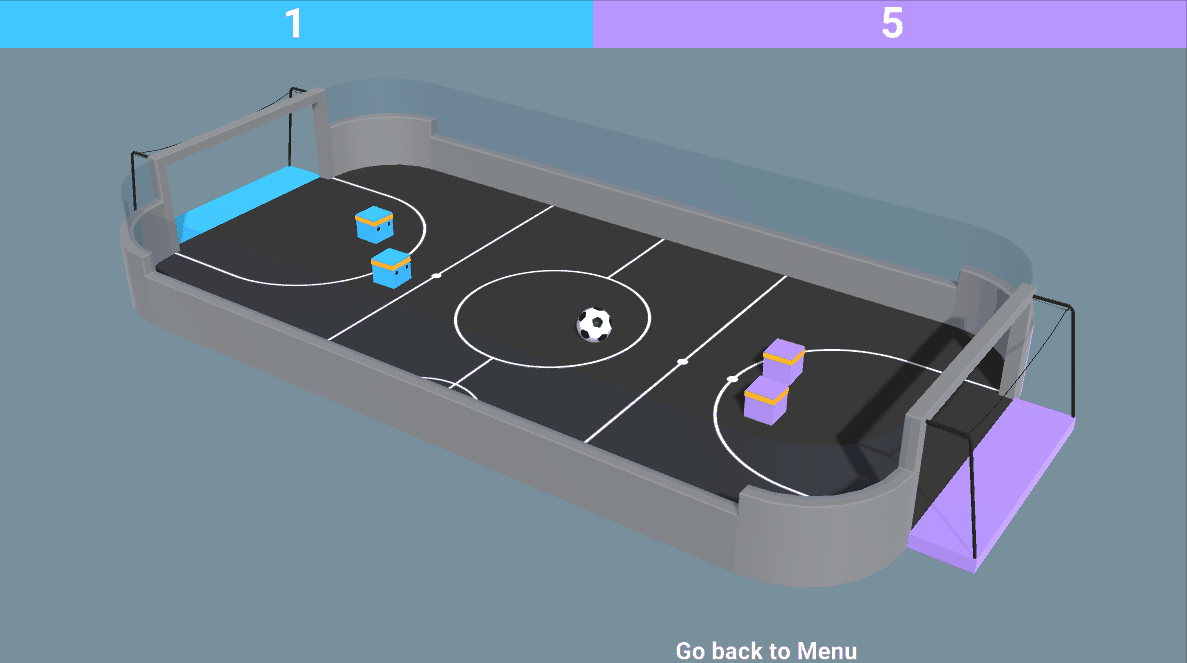
- 智能体：环境包含两个不同的多智能体组，每组有两个智能体。参数：SoccerTwos。
- 智能体奖励函数（依赖）：
    -   (1 - accumulated time penalty ) 当球进入对方球门时， accumulated time penalty 每次固定更新时增加 (1 / MaxStep )，并在每局开始时重置为 0。
    -   -1 当球进入己方球门时。
    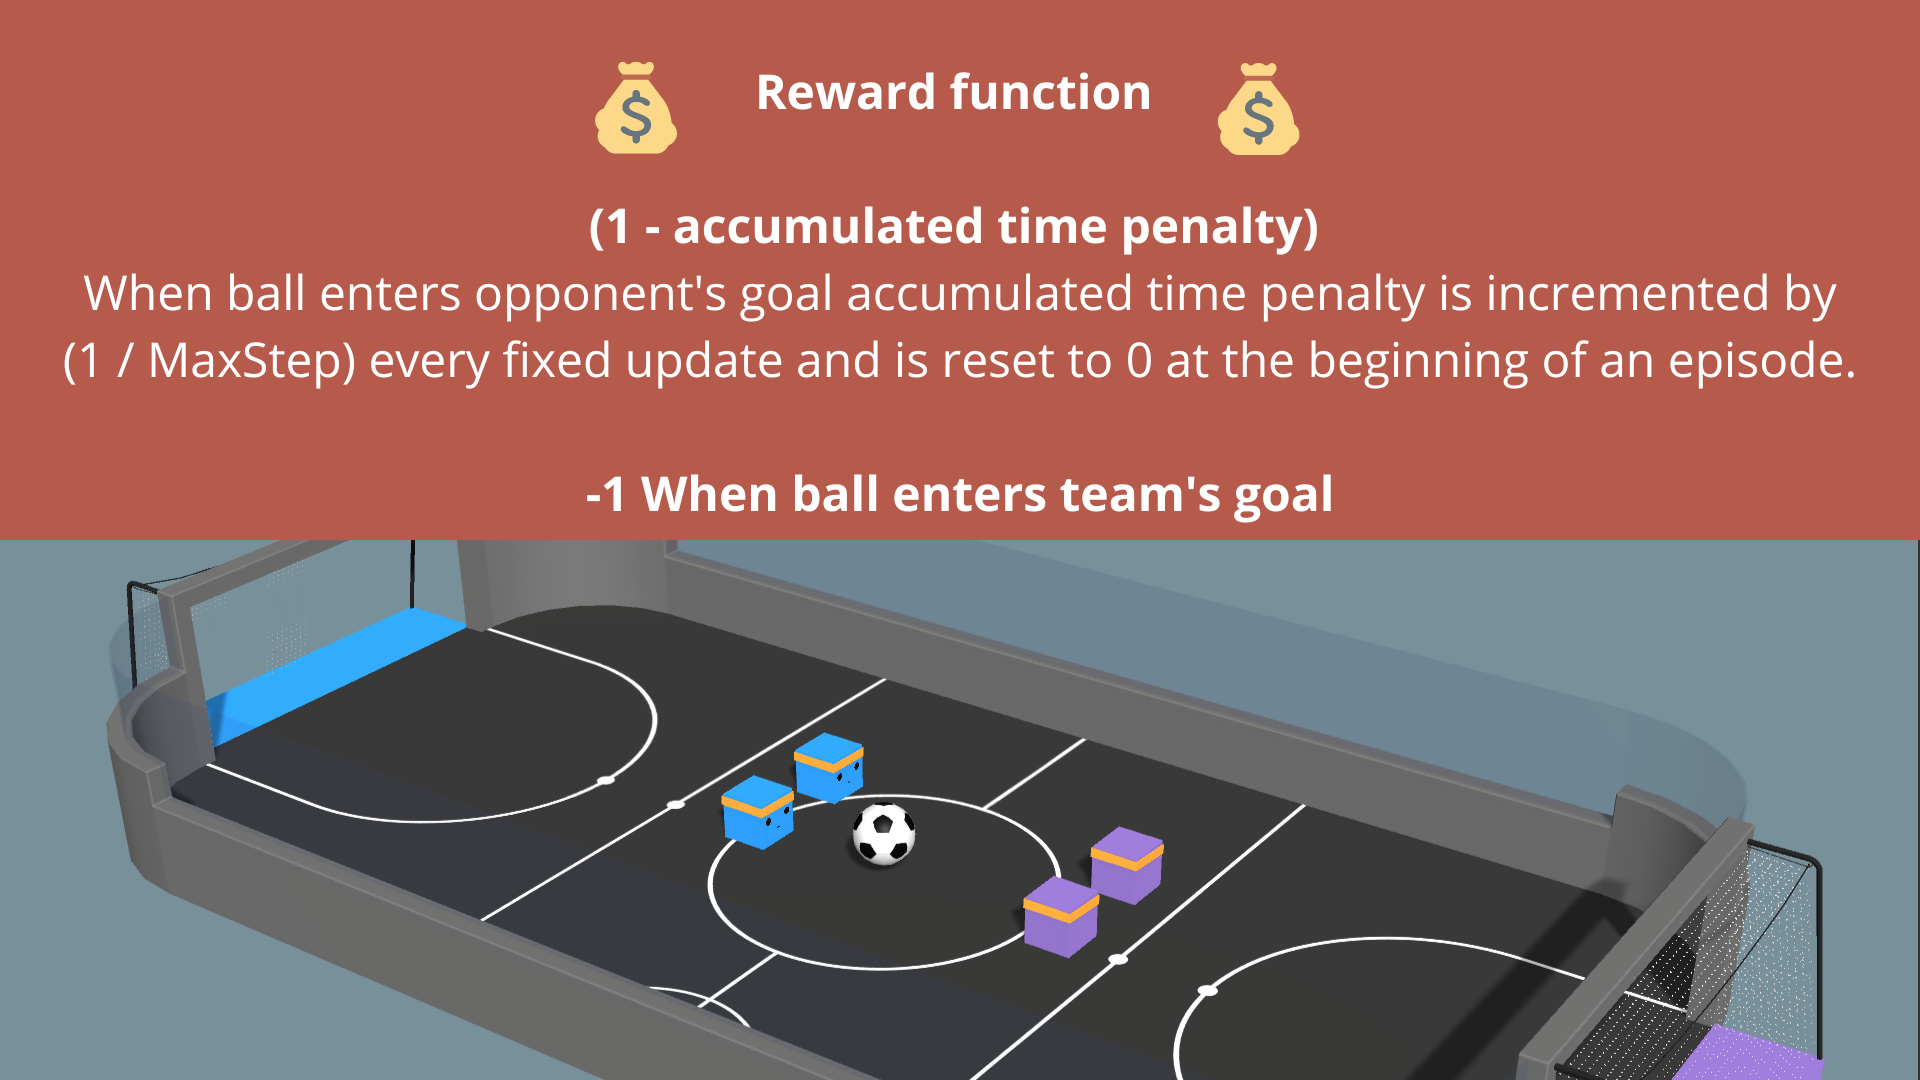
- 行为参数：
    -   向量观察空间：336，对应于 11 个向前发射的射线，分布在 120 度范围内，以及 3 个向后发射的射线，分布在 90 度范围内，每个射线检测 6 种可能的物体类型，以及物体的距离。向前发射的射线贡献 264 个状态维度，向后发射的射线贡献 72 个状态维度，分布在三个观察堆栈中。
    - 两种射线检测都可以检测到 6 个物体： Ball  球, Blue Goal  蓝目标, Purple Goal  紫色目标,Wall  墙壁, Blue Agent  蓝, Purple Agent  紫
    -   动作：3 个离散分支动作，对应于向前、向后、侧向移动以及旋转。
    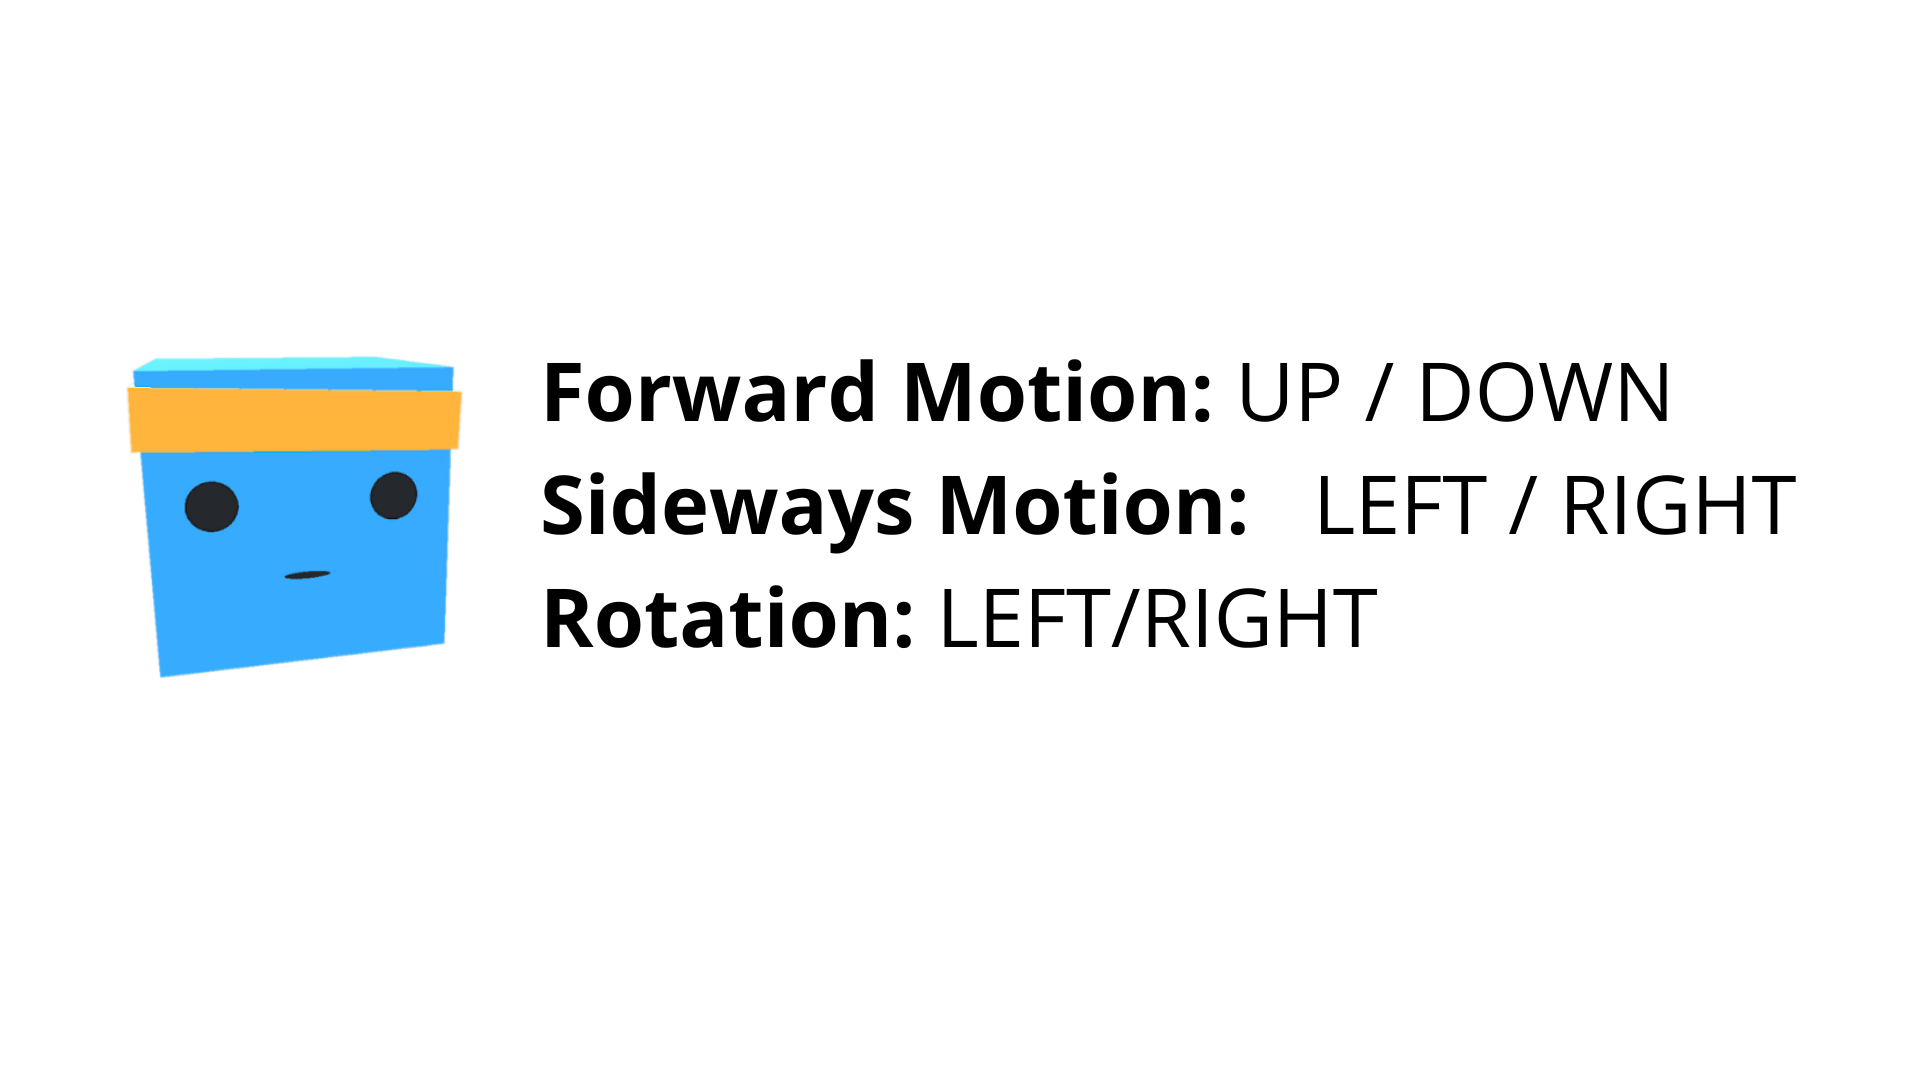
    -   视觉观察：无
- 浮点属性：两个
    -   ball_scale：指定球在三维空间中的缩放比例（三个维度相等）
    -   gravity: 重力的大小
        -       默认值：9.81, 推荐最小值：6, 推荐最大值：20

目标：控制你的足球队得分并防守

观测空间：336维向量（前11后3个射线，每种射线可感知6种物体）

动作空间：3个离散分支（移动/射门/等动作）

## 2.MA-POCA 多智能体联合训练
训练智能体与其他智能体对抗：可以使用自我博弈, 这是一种非常适合 1 对 1 的技巧。

但我们的情况是 2 对 2，每个队伍有 2 个智能体, 那么如何训练智能体群体的合作行为呢？

正如 Unity 博客中解释的，当队伍得分时，智能体通常会作为一个群体获得奖励（+1 - 惩罚）。这意味着队伍中的每个智能体都会获得奖励，即使每个智能体对胜利的贡献不同，这使得独立学习该做什么变得困难。

Unity MLAgents 团队开发了一种新的多智能体训练器解决方案，称为 MA-POCA(Multi-Agent POsthumous Credit Assignment).（多智能体死后信用分配）。

想法简单但强大：一个中央Critic处理团队中所有智能体的状态，以估计每个智能体的表现, 将这个评价者想象成一个教练。

这使得每个智能体**仅根据其局部感知做出决策**，并同时**评估其行为在整个团队中**的好坏。

**MA-POCA 的集中式学习和分布式执行**
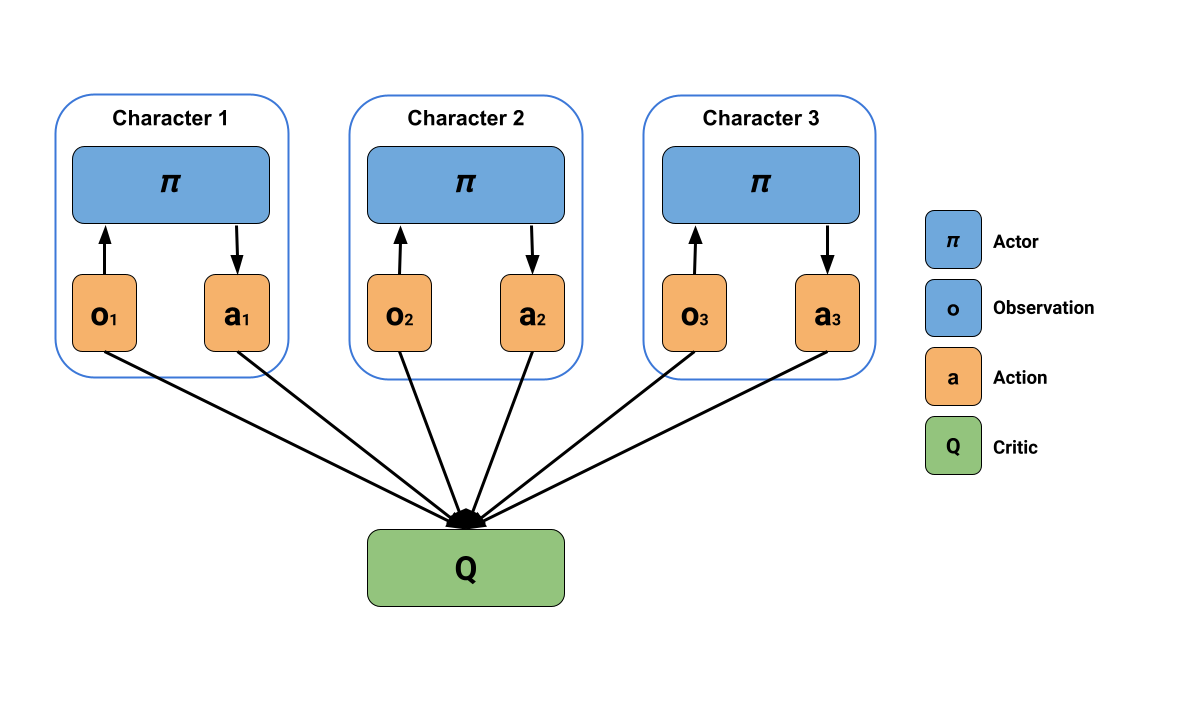

解决方案就是使用带有 MA-POCA 训练器（称为 poca）的自博弈, poca 训练器将帮助我们训练合作行为，并通过自博弈战胜对手团队。

- 使用 centralized critic（中心化评论者，队友状态作为输入）训练多智能体协作, 算法论文: https://arxiv.org/pdf/2111.05992.pdf

## 3. 配置训练参数（config 文件）
在 ml-agents/config/poca/SoccerTwos.yaml 文件夹下创建或按如下内容修改：

[**文档原文链接**](https://github.com/Unity-Technologies/ml-agents/blob/release_20_docs/docs/Training-Configuration-File.md)
| 配置项 | 说明 |
|---|---|
| `trainer_type` | （默认：`ppo`）使用的训练器类型，可选：`ppo`、`sac` 或 `poca`。|
| `summary_freq` | （默认：`5000`）多少条经验后生成并展示训练统计信息，影响Tensorboard中图表的粒度。|
| `time_horizon` | （默认：`64`）每个智能体收集多少步经验后加入经验缓冲区。过小会更有偏差但方差小，过大反之，适当设置以覆盖重要行为。推荐范围：32-2048。|
| `max_steps` | （默认：`5000`）训练过程中的总步数，达到该步数后训练结束。支持设置较大值，如50万到一千万。|
| `keep_checkpoints` | （默认：`5`）最多保留的模型检查点数量，超过后会删除最旧的。|
| `checkpoint_interval` | （默认：`5000`）每收集多少条经验保存一次检查点（checkpoint）。|
| `init_path` | （默认：无）从以前保存的模型初始化训练，路径应与当前配置兼容。|
| `threaded` | （默认：`false`）训练期间允许环境和模型并行步进。使用SAC时可加快训练，Self-Play建议保持为`false`。|
| `hyperparameters -> learning_rate` | （默认：`3e-4`）初始学习率，影响梯度下降的强度。通常训练不稳定时减小此值。推荐范围：1e-5 ~ 1e-3。|
| `hyperparameters -> batch_size` | 每次梯度下降的样本数量，应远小于`buffer_size`。连续动作建议用1000左右，离散动作约10-100。范围（连续PPO）：512-5120，（连续SAC）：128-1024，（离散）：32-512。|
| `hyperparameters -> buffer_size` | PPO默认10240，SAC默认5000。PPO：每次更新模型前收集多少经验；SAC：经验池最大容量。一般越大越稳定。PPO推荐2048-409600，SAC推荐5000以上。|
| `hyperparameters -> learning_rate_schedule` | PPO默认`linear`，SAC默认`constant`。PPO推荐随步数线性递减，SAC保持恒定。|
| `network_settings -> hidden_units` | （默认：`128`）神经网络每层的单元数。任务简单可设小，复杂行为需设大。推荐范围：32-512。|
| `network_settings -> num_layers` | （默认：`2`）神经网络隐藏层数。简单问题用少量层更好，复杂问题需较多。推荐范围：1-3。|
| `network_settings -> normalize` | （默认：`false`）是否对向量观测做归一化。对于复杂连续控制问题有益，简单离散任务建议不用。|
| `network_settings -> vis_encode_type` | （默认：`simple`）视觉观测的编码器类型。可选值包括：`simple`（两层卷积），`nature_cnn`（三层卷积），`resnet`，`match3`（适合棋盘类），`fully_connected`（无卷积，仅用于小型输入）。|
| `network_settings -> conditioning_type` | （默认：`hyper`）目标观测的策略条件类型。无特殊需求用默认即可，注意`hyper`型参数量会大幅增加，建议减少`hidden_units`。|



```yaml
behaviors:
  SoccerTwos:
    trainer_type: poca
    hyperparameters:
      batch_size: 2048
      buffer_size: 20480
      learning_rate: 0.0003
      beta: 0.005
      epsilon: 0.2
      lambd: 0.95
      num_epoch: 3
      learning_rate_schedule: constant
    network_settings:
      normalize: false
      hidden_units: 512
      num_layers: 2
      vis_encode_type: simple
    reward_signals:
      extrinsic:
        gamma: 0.99
        strength: 1.0
    keep_checkpoints: 5
    max_steps: 5000000
    checkpoint_interval: 50000 # 每隔50,000步保存一次检查点
    time_horizon: 1000
    summary_freq: 10000
    self_play:
      save_steps: 50000
      team_change: 200000
      swap_steps: 2000
      window: 10
      play_against_latest_model_ratio: 0.5
      initial_elo: 1200.0
```

## 4. 开始训练
在 Jupyter Notebook 终端执行如下命令：
- 训练时长：大约 5-8 小时，5M 步左右效果较好。
- 建议：关闭系统休眠，Ctrl+C 停止时只按一次，等待最终模型生成。

In [2]:
!mlagents-learn ./ml-agents/config/poca/SoccerTwos.yaml --env=./ml-agents/training-envs-executables/SoccerTwos/SoccerTwos.exe --run-id="SoccerTwos" --no-graphics --resume


            ┐  ╖
        ╓╖╬│╡  ││╬╖╖
    ╓╖╬│││││┘  ╬│││││╬╖
 ╖╬│││││╬╜        ╙╬│││││╖╖                               ╗╗╗
 ╬╬╬╬╖││╦╖        ╖╬││╗╣╣╣╬      ╟╣╣╬    ╟╣╣╣             ╜╜╜  ╟╣╣
 ╬╬╬╬╬╬╬╬╖│╬╖╖╓╬╪│╓╣╣╣╣╣╣╣╬      ╟╣╣╬    ╟╣╣╣ ╒╣╣╖╗╣╣╣╗   ╣╣╣ ╣╣╣╣╣╣ ╟╣╣╖   ╣╣╣
 ╬╬╬╬┐  ╙╬╬╬╬│╓╣╣╣╝╜  ╫╣╣╣╬      ╟╣╣╬    ╟╣╣╣ ╟╣╣╣╙ ╙╣╣╣  ╣╣╣ ╙╟╣╣╜╙  ╫╣╣  ╟╣╣
 ╬╬╬╬┐     ╙╬╬╣╣      ╫╣╣╣╬      ╟╣╣╬    ╟╣╣╣ ╟╣╣╬   ╣╣╣  ╣╣╣  ╟╣╣     ╣╣╣┌╣╣╜
 ╬╬╬╜       ╬╬╣╣      ╙╝╣╣╬      ╙╣╣╣╗╖╓╗╣╣╣╜ ╟╣╣╬   ╣╣╣  ╣╣╣  ╟╣╣╦╓    ╣╣╣╣╣
 ╙   ╓╦╖    ╬╬╣╣   ╓╗╗╖            ╙╝╣╣╣╣╝╜   ╘╝╝╜   ╝╝╝  ╝╝╝   ╙╣╣╣    ╟╣╣╣
   ╩╬╬╬╬╬╬╦╦╬╬╣╣╗╣╣╣╣╣╣╣╝                                             ╫╣╣╣╣
      ╙╬╬╬╬╬╬╬╣╣╣╣╣╣╝╜
          ╙╬╬╬╣╣╣╜
             ╙
        
 Version information:
  ml-agents: 1.2.0.dev0,
  ml-agents-envs: 1.2.0.dev0,
  Communicator API: 1.5.0,
  PyTorch: 2.1.2+cu121
[WARNING] PyTorch checkpoint was saved with a different version of PyTorch. Model may not resume properly.
[INFO] Connected to Unity environment w

D:\DevelopmentSoftware\Anaconda\envs\mlagents_py3_10_12\lib\site-packages\torch\utils\_device.py:77: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3618.)
  return func(*args, **kwargs)


查看tensorboard

In [2]:
%load_ext tensorboard
%tensorboard --logdir=./results

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


### 可改进之处
- **奖励 (Reward) 非常低**
从最终日志 Mean Reward: 0.000 和 Mean Group Reward: 0.036 来看， TensorBoard 图表中的 Environment/Cumulative Reward 曲线几乎全程贴着 0 来看，智能体队伍很少能进球得分。

在 SoccerTwos 环境中，主要的正奖励来自于进球。奖励接近于 0 意味着比赛经常以 0:0 的平局结束。

- **综合分析：“为什么 ELO 很高，但奖励却很低？”**
这是一个在自博弈中非常经典的现象,智能体可能学会了非常强大的“防守”策略，但“进攻”能力还很欠缺。

    - ELO 的含义：ELO 的提升意味着“现在的你”比“过去的你”更强。

    - 训练过程解读：您的智能体在和自己的历史版本对抗时，可能很快就学会了如何截球、如何阻挡对方前进、如何守门。因为防守成功（不丢球）比组织一次成功的进攻并射门得分要容易得多。

    - 最终结果：训练结束时，您得到了两个都精通防守的队伍。当它们互相比赛时，谁也无法攻破对方的球门，导致了大量的平局和极低的奖励。但是，这个“精通防守”的智能体，毫无疑问比一开始连球都碰不到的“自己”要强大得多，所以它的 ELO 评级会很高。

### 下一步建议
- 加长训练时间：
这是最直接有效的方法。复杂的进攻策略（如带球、传球、射门）往往需要在牢固的防守基础上，通过更长时间的探索才能涌现。您可以尝试将 max_steps 增加到 10,000,000 甚至更高，然后继续训练。

- 观察智能体行为：
使用 mlagents-learn 的 --resume 标志加载您已经训练好的模型，并去掉 --no-graphics，打开 Unity 编辑器来观看比赛。仔细观察：

- 调整超参数 ：

可以适当提高 gamma 值 (如从 0.99 到 0.995)。更高的 gamma 值会让智能体更有“远见”，更愿意为了未来的一个大奖励（进球）而做出一系列的铺垫动作。


## 5. 推送模型到 Hugging Face Hub
1. 终端登录：

In [1]:
!huggingface-cli login

^C


2. 推送模型（结果目录通常为 ./results/SoccerTwos，repo-id 建议形如 yourname/poca-soccertwos）：

In [ ]:
%%bash
mlagents-push-to-hf \
  --run-id="SoccerTwos" \
  --local-dir="./results/SoccerTwos" \
  --repo-id="你的huggingface用户名/poca-SoccerTwos" \
  --commit-message="First Push"

## 6. 验证模型是否上线
- 进入 Hugging Face 页面，检查模型卡（README）及 ML-Agents-SoccerTwos 标签、SoccerTwos.onnx 文件是否存在
- 如果没有标签，手动编辑 README 加上该关键词

## 7. 可视化比赛
- 在线演示：SoccerTwos Demo https://huggingface.co/spaces/unity/ML-Agents-SoccerTwos
- 选择你的模型作为蓝队/紫队，与其他模型对抗，观察效果
- 排行榜与对战历史：ELO Leaderboard https://huggingface.co/spaces/huggingface-projects/AIvsAI-SoccerTwos
- 分析工具：SoccerTwos Challenge Analytics https://huggingface.co/spaces/cyllum/soccertwos-analytics